# MI-ADM: home assignment 1

  * **Deadline**: 15/04/2019, -2 points for a late submission, the hard deadline is the first day of the exam period.
  * **What to submit**: Just this notebook with you code and texts, not the dataset!
  * **How to submit**: See the instructions at https://courses.fit.cvut.cz/MI-ADM/tutorials/index.html.
  
Generally speaking, the goal of this assignment is to use **decision trees and related methods (boosted trees, random forests) for the regression problem**.

What to do:
  * Study the data from `house-prices.csv` (see also `house-prices_description.txt`) and prepare them for application of the algorithms (decision tree, random forest, XGBoost).
  * Treat the missing values and nominal/ordinal variables reasonably; experiment with various approaches.
  * Try to replace the continuous features with some discrete ones (indicator variables, dummy variables, binning, ...). 
  * Tune some reasonably selected hyperparameters (using cross-validation or just a validation set) and measure the results using *Root mean squared logarithmic error (RMSLE)*.

In [16]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics

import sklearn.model_selection.RandomizedSearchCV

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor

import numpy as np

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error


# the logarithm of SalesPrice must be used to evaluate RMSLE properly
# you can comment out the following line and apply the log just before evaluating RMSLE
#

ModuleNotFoundError: No module named 'sklearn.model_selection.RandomizedSearchCV'

In [3]:
data = pd.read_csv('house-prices.csv')

data['ExterCond'] = data['ExterCond'].fillna('NA')
data['ExterQual'] = data['ExterQual'].fillna('NA')
data['BsmtQual'] = data['BsmtQual'].fillna('NA')
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('NA')
data['Alley'] = data['Alley'].fillna('NA')
data['PoolQC'] = data['PoolQC'].fillna('NA')
data['Fence'] = data['Fence'].fillna('NA')
data['MiscFeature'] = data['MiscFeature'].fillna('NA')
data['GarageQual'] = data['GarageQual'].fillna('NA')
data['GarageCond'] = data['GarageCond'].fillna('NA')
data['GarageType'] = data['GarageType'].fillna('NA')
data['GarageYrBlt'] = data['GarageYrBlt'].fillna('NA')
data['GarageFinish'] = data['GarageFinish'].fillna('NA')
data['FireplaceQu'] = data['FireplaceQu'].fillna('NA')
data['PoolQC'] = data['PoolQC'].fillna('NA')
data['Neighborhood'] = data['Neighborhood'].fillna('NA')
data['Electrical'] = data['Electrical'].fillna('NA')
data['BsmtCond'] = data['BsmtCond'].fillna('NA')
data['BsmtExposure'] = data['BsmtExposure'].fillna('NA')
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('NA')
data['MasVnrType'] = data['MasVnrType'].fillna('NA')    

data['LotFrontage'] = data['LotFrontage'].fillna(0)
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)
data['BsmtFinSF1'] = data['BsmtFinSF1'].fillna(0)
data['BsmtFinSF2'] = data['BsmtFinSF2'].fillna(0)
data['BsmtUnfSF'] = data['BsmtUnfSF'].fillna(0)
data['TotalBsmtSF'] = data['TotalBsmtSF'].fillna(0)
data['PoolArea'] = data['PoolArea'].fillna(0)

#data['GarageYrBlt'] = data['GarageYrBlt'].fillna('NANA')
#data['GarageYrBlt'].apply(lambda x: str(x)[,-1])
data = data.drop(columns=['GarageYrBlt','Id'])


display(data.info(verbose=True))




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 no

None

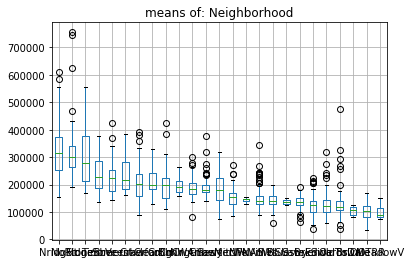

In [4]:
def show_median_price_by_feature(feature):
    grouped = data.groupby([feature])
    df2 = pd.DataFrame({col:vals['SalePrice'] for col,vals in grouped})

    meds = df2.median()
    meds.sort_values(ascending=False,inplace=True)



    df2 = df2[meds.index]
    df2.boxplot()
    plt.title("means of: " + feature)
    plt.show()
    
def replace_value_by_median_price(feature):
    grouped = data.groupby([feature])
    df2 = pd.DataFrame({col:vals['SalePrice'] for col,vals in grouped})
    meds = df2.median()
    neighbr_map = {m:int(meds[m]) for m in meds.index}
    data[feature] = data[feature].apply(lambda x: neighbr_map[x])
    
show_median_price_by_feature('Neighborhood')
replace_value_by_median_price('Neighborhood')


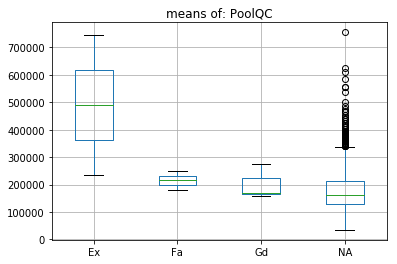

In [5]:
show_median_price_by_feature('PoolQC')
replace_value_by_median_price('PoolQC')

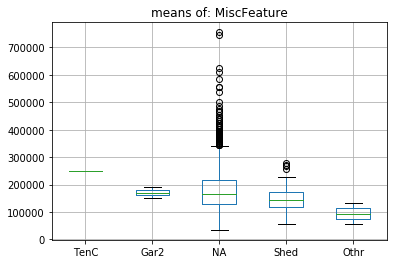

In [6]:
show_median_price_by_feature('MiscFeature')
replace_value_by_median_price('MiscFeature')

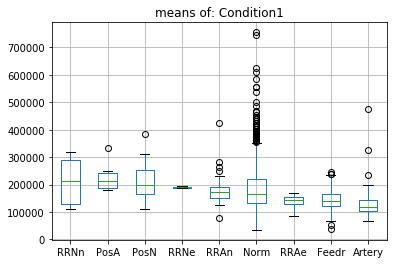

In [7]:
show_median_price_by_feature('Condition1')
replace_value_by_median_price('Condition1')

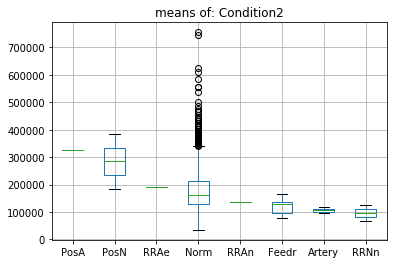

In [8]:
show_median_price_by_feature('Condition2')
replace_value_by_median_price('Condition2')

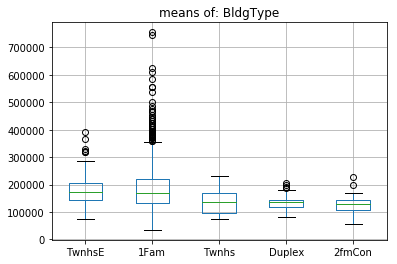

In [9]:
show_median_price_by_feature('BldgType')
replace_value_by_median_price('BldgType')

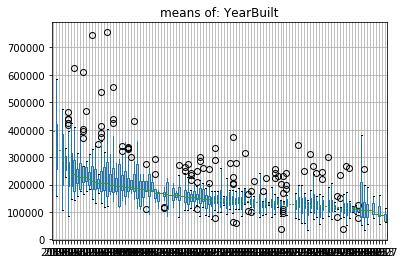

In [10]:
show_median_price_by_feature('YearBuilt')
replace_value_by_median_price('YearBuilt')

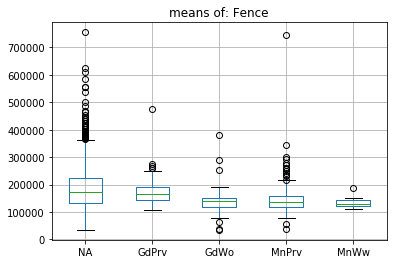

In [11]:
show_median_price_by_feature('Fence')
replace_value_by_median_price('Fence')

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

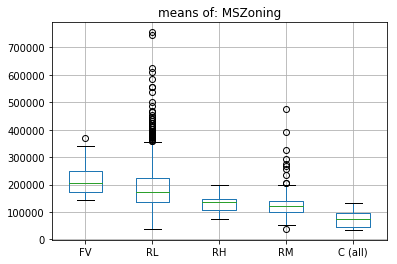

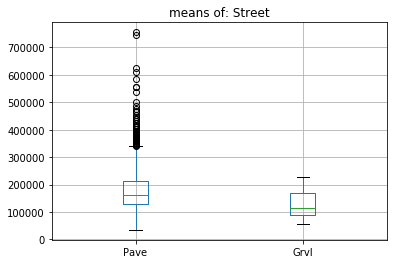

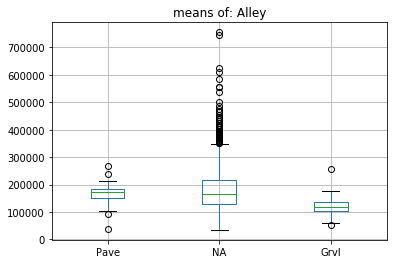

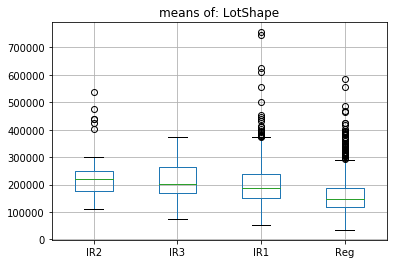

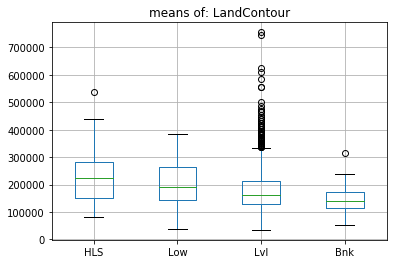

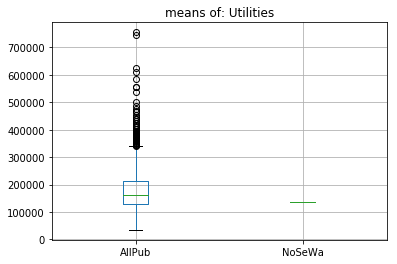

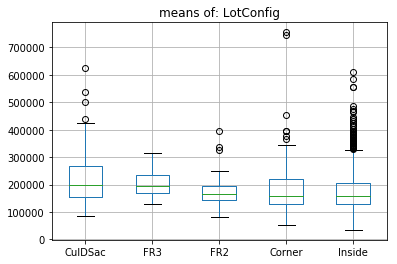

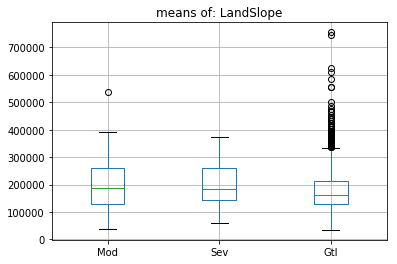

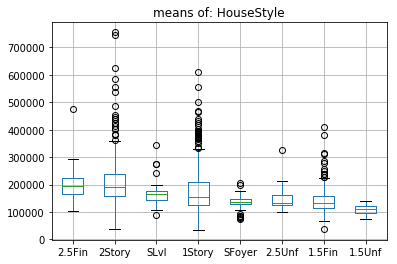

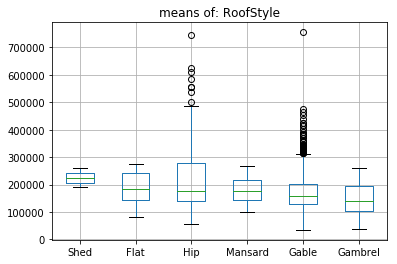

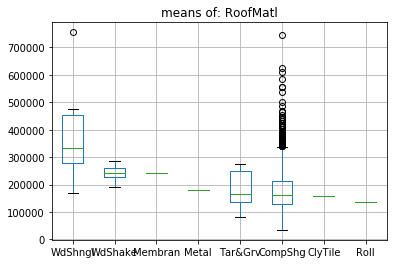

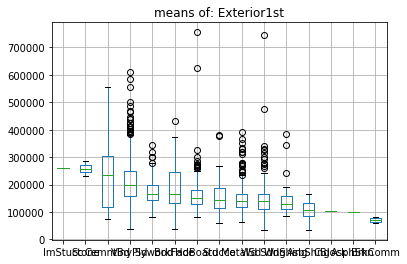

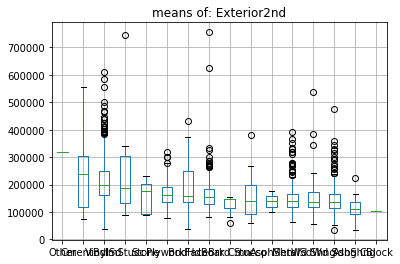

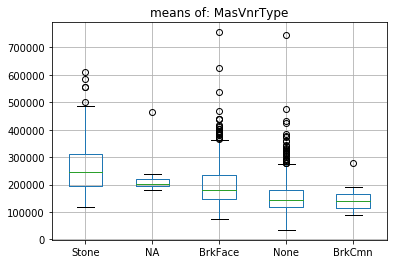

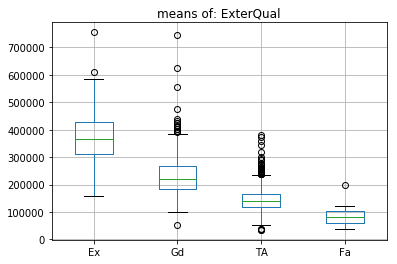

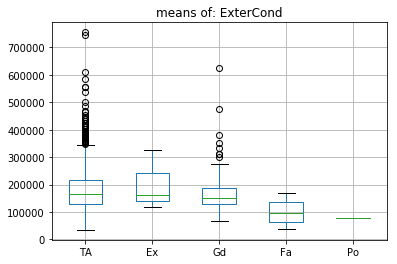

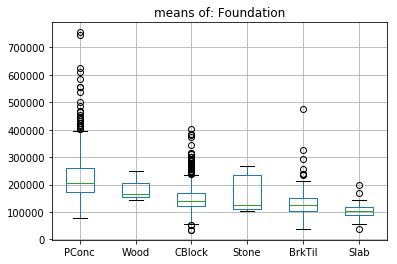

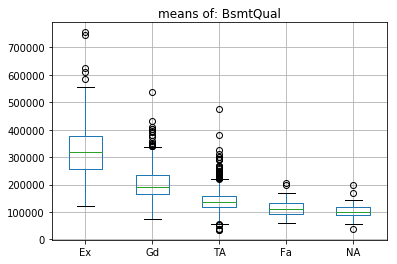

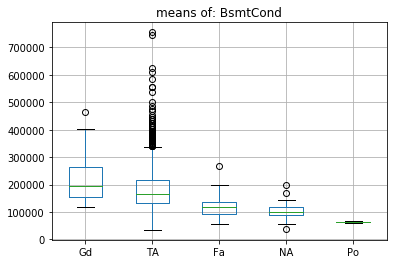

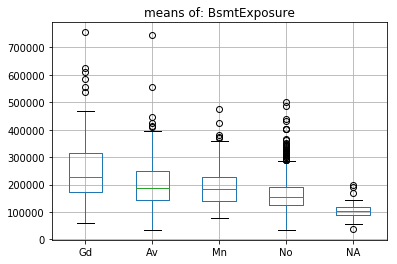

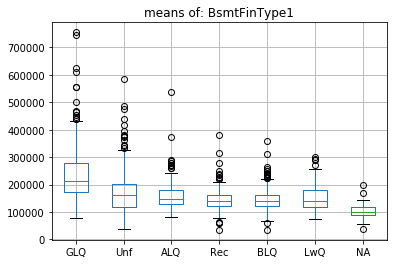

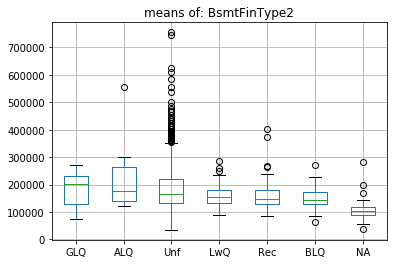

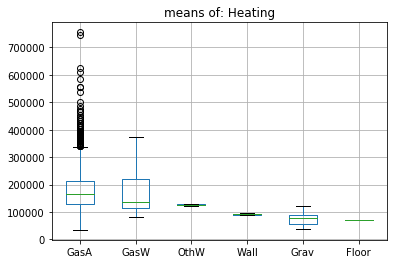

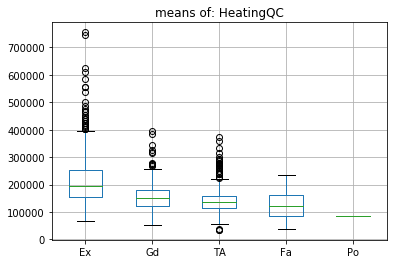

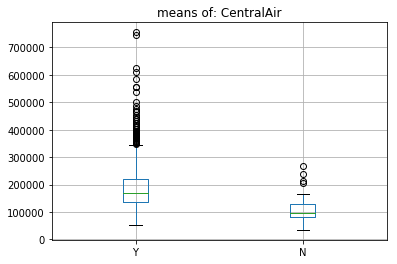

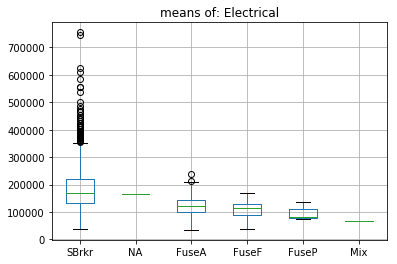

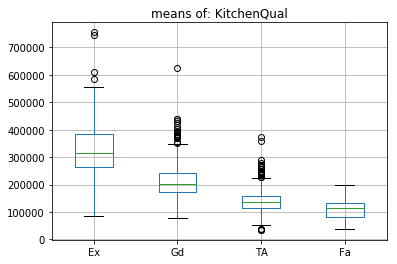

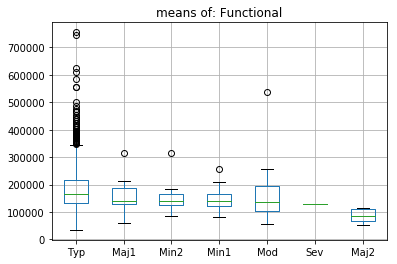

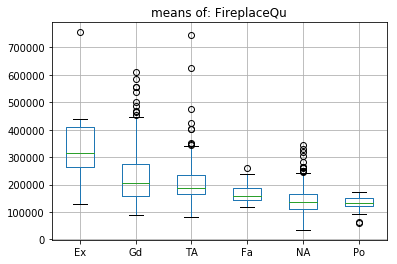

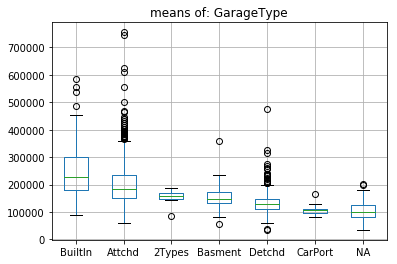

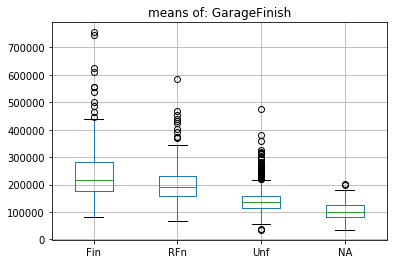

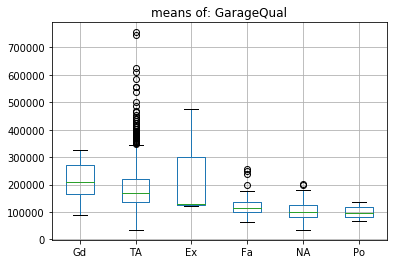

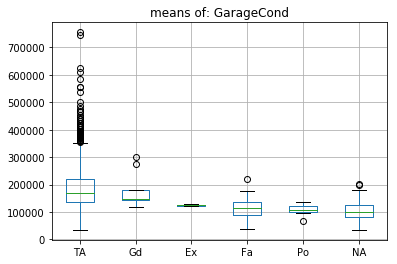

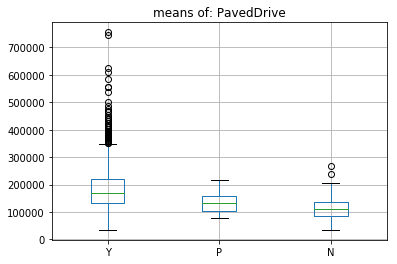

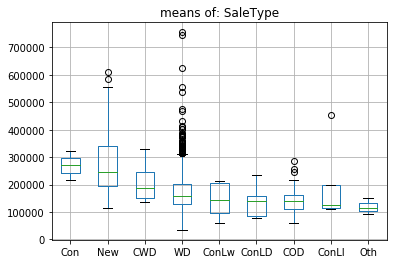

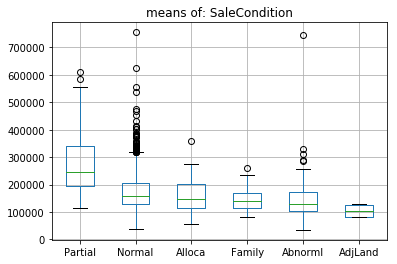

In [12]:
display(data.select_dtypes(include=['object']).columns)

for c in data.select_dtypes(include=['object']).columns:
    try:
        show_median_price_by_feature(c)
        replace_value_by_median_price(c)
    except:
        continue

In [13]:
data.SalePrice = data.SalePrice.apply(math.log) 
display(data.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null int64
Alley            1460 non-null int64
LotShape         1460 non-null int64
LandContour      1460 non-null int64
Utilities        1460 non-null int64
LotConfig        1460 non-null int64
LandSlope        1460 non-null int64
Neighborhood     1460 non-null int64
Condition1       1460 non-null int64
Condition2       1460 non-null int64
BldgType         1460 non-null int64
HouseStyle       1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null int64
RoofMatl         1460 non-null int64
Exterior1st      1460 non-null int64
Exterior2nd      1460 non-null int64
Mas

None

<IPython.core.display.Javascript object>


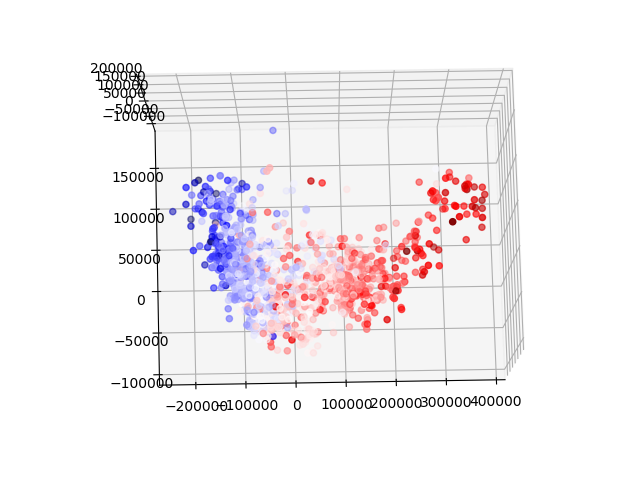

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

%matplotlib notebook

colors = ['blue','purple','red']

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(data.iloc[:,:-1])

fig = plt.figure()
ax = Axes3D(fig)

x=principalComponents[:, 0]
y=principalComponents[:, 1]
z=principalComponents[:, 2]

x1, y1 = np.meshgrid(x, y)

cset = ax.scatter(x,y,z,c=data.iloc[:,-1],cmap='seismic')
#ax.clabel(cset, fontsize=9, inline=1)
plt.show()


In [26]:

pca = PCA(n_components=20)
scaled = pca.fit_transform(data.iloc[:,:-1])

X, Xtest, y, ytest = train_test_split(scaled, data.iloc[:,-1], test_size=0.25, random_state=33) 
display(X.shape)
display(y.shape)
display(ytest.shape)

(1095, 20)

(1095,)

(365,)

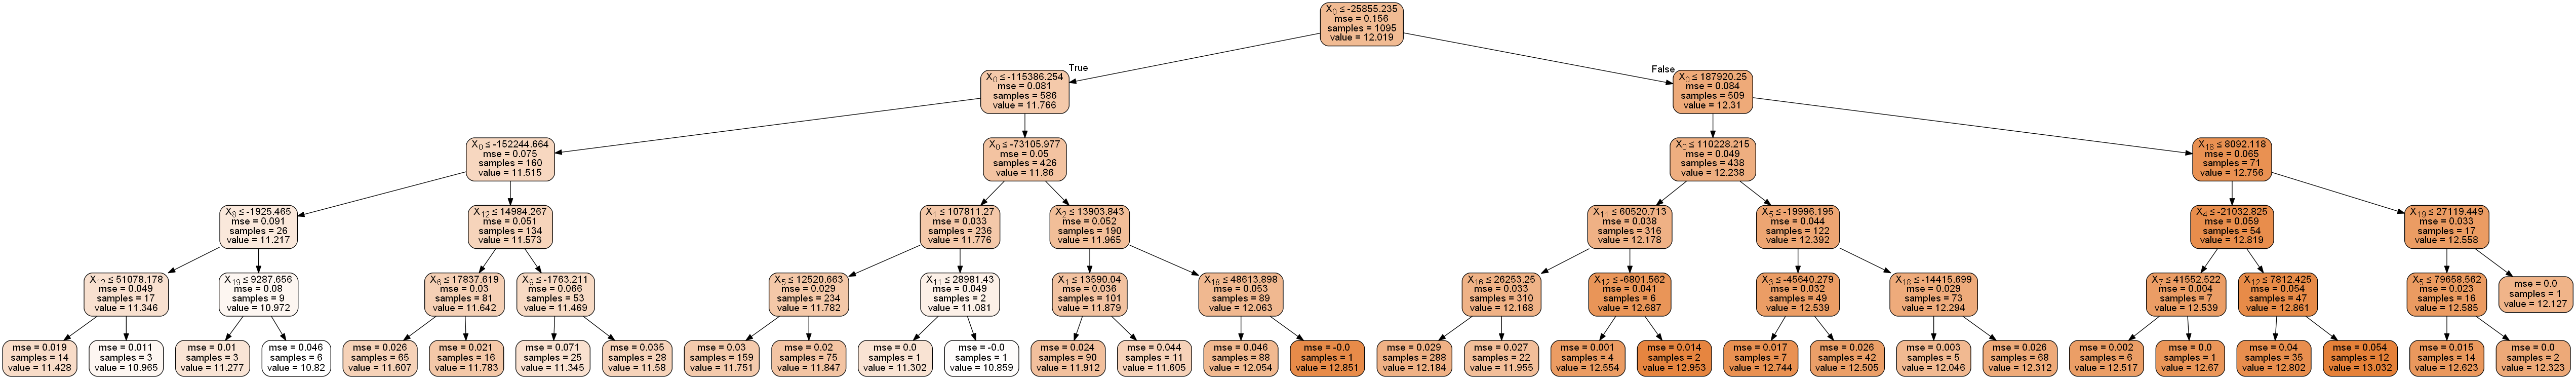

In [27]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus


def plotTree(dt):
    dot_data = StringIO()
    tree.export_graphviz(dt, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))
    
dt =  DecisionTreeRegressor(max_depth=5)
dt.fit(X,y)

plotTree(dt)

In [28]:
depths = range(1,80)
train_acc = []
test_acc = []

for depth in depths:
    dt =  DecisionTreeRegressor(max_depth=depth)
    dt.fit(X,y)
    train_acc.append(np.sqrt(mean_squared_error(dt.predict(X), y)))
    test_acc.append(np.sqrt(mean_squared_error(dt.predict(Xtest), ytest)))

<IPython.core.display.Javascript object>


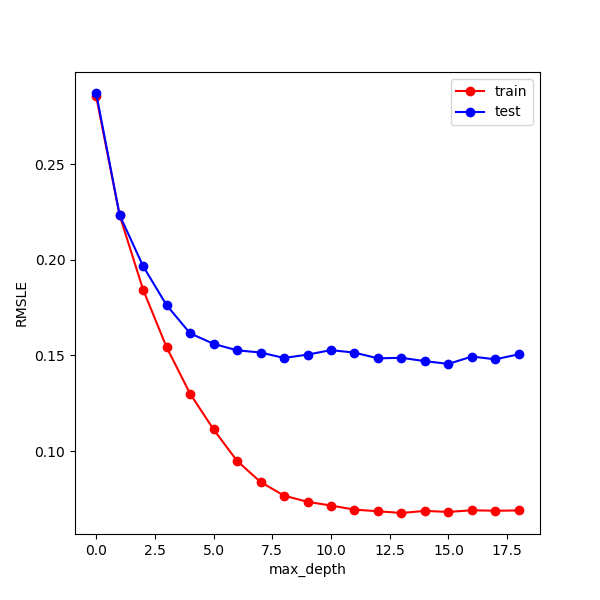

In [76]:
plt.figure(figsize=(6,6))
plt.plot(train_acc,'or-')
plt.plot(test_acc,'ob-')
plt.xlabel('max_depth')
plt.ylabel('RMSLE')
plt.legend(['train', 'test'])

In [30]:
depths = range(1,8)
train_acc = []
test_acc = []

for depth in depths:
    display(depth)
    dt =  GradientBoostingRegressor(learning_rate=0.2, n_estimators=10000, max_depth=depth, verbose=False)
    dt.fit(X,y)
    train_acc.append(np.sqrt(mean_squared_error(dt.predict(X), y)))
    test_acc.append(np.sqrt(mean_squared_error(dt.predict(Xtest), ytest)))

1

2

3

4

5

6

7

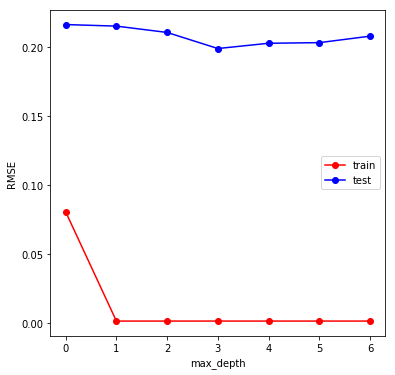

In [31]:
plt.figure(figsize=(6,6))
plt.plot(train_acc,'or-')
plt.plot(test_acc,'ob-')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.legend(['train', 'test'])

## Its possible to see that RMSE is growing lets try to nudge number of estimators 

In [32]:
estimators = range(10000,30000,5000)
train_acc = []
test_acc = []

for ests in estimators:
    display(ests)
    dt =  GradientBoostingRegressor(learning_rate=0.2, n_estimators=ests, max_depth=2, verbose=False)
    dt.fit(X,y)
    train_acc.append(np.sqrt(mean_squared_error(dt.predict(X), y)))
    test_acc.append(np.sqrt(mean_squared_error(dt.predict(Xtest), ytest)))

10000

15000

20000

25000

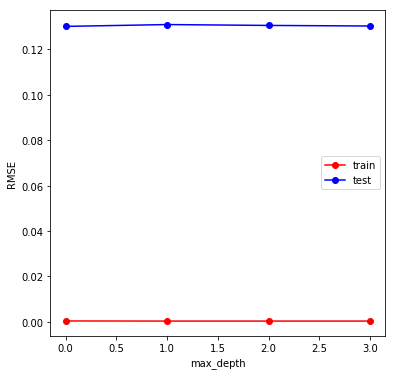

In [62]:
plt.figure(figsize=(6,6))
plt.plot(train_acc,'or-')
plt.plot(test_acc,'ob-')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.legend(['train', 'test'])

## Estimators does not seem to be significant factor

In [63]:
depths = range(1,80)
train_acc = []
test_acc = []

for depth in depths:
    dt =  DecisionTreeRegressor(max_depth=depth,criterion='entropy')
    dt.fit(X,y)
    train_acc.append(np.sqrt(mean_squared_error(dt.predict(X), y)))
    test_acc.append(np.sqrt(mean_squared_error(dt.predict(Xtest), ytest)))

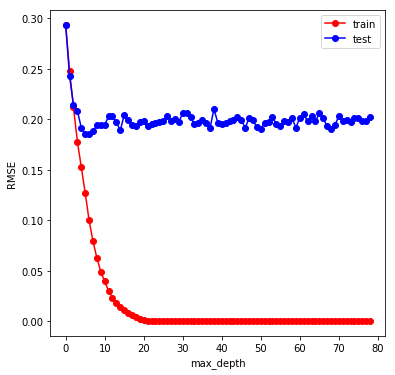

In [64]:
plt.figure(figsize=(6,6))
plt.plot(train_acc,'or-')
plt.plot(test_acc,'ob-')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.legend(['train', 'test'])

In [65]:
import xgboost

depths = range(1,50,5)
train_acc = []
test_acc = []

for depth in depths:
    dt = xgboost.sklearn.XGBRegressor(max_depth=depth, n_estimators=1000, verbosity=1, objective='reg:linear', gamma=0.1, learning_rate=0.1)
    dt.fit(X,y)
    train_acc.append(np.sqrt(mean_squared_error(dt.predict(X), y)))
    test_acc.append(np.sqrt(mean_squared_error(dt.predict(Xtest), ytest)))

C:\programs\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\programs\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\programs\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\programs\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\programs\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\programs\Anaconda3\lib\site-pack

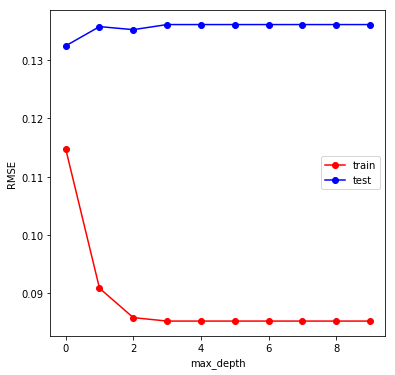

In [37]:
plt.figure(figsize=(6,6))
plt.plot(train_acc,'or-')
plt.plot(test_acc,'ob-')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.legend(['train', 'test'])

### PCA experiment

In [80]:
features = range(1,78,1)
train_acc = []
test_acc = []

for feature in features:
    pca = PCA(n_components=feature)
    
    X, Xtest, y, ytest = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.25, random_state=33) 

    X = pca.fit_transform(X)
    Xtest = pca.transform(Xtest)
    
    dt = RandomForestRegressor(random_state=1,criterion='mse',max_depth=25,min_samples_leaf=1, n_estimators = 10)
    dt.fit(X,y)
    train_acc.append(np.sqrt(mean_squared_error(dt.predict(X), y)))
    test_acc.append(np.sqrt(mean_squared_error(dt.predict(Xtest), ytest)))


<IPython.core.display.Javascript object>


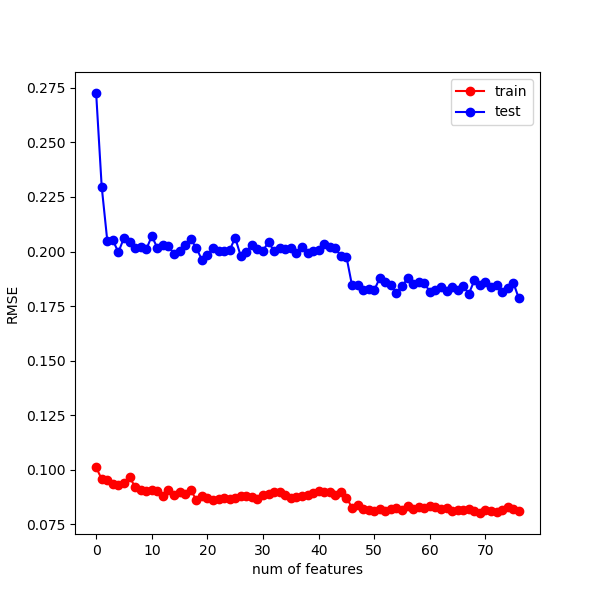

In [81]:
plt.figure(figsize=(6,6))
plt.plot(train_acc,'or-')
plt.plot(test_acc,'ob-')
plt.xlabel('num of features')
plt.ylabel('RMSE')
plt.legend(['train', 'test'])

### Run random Forest, run!

In [36]:
 X, Xtest, y, ytest = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.25, random_state=33) 

depths = range(1,20)
train_acc = []
test_acc = []
for depth in depths:
    dt = RandomForestRegressor(random_state=1,criterion='mse',max_depth=depth,min_samples_leaf=1, n_estimators = 10)
    dt.fit(X,y)
    train_acc.append(np.sqrt(mean_squared_error(y, dt.predict(X))))
    test_acc.append(np.sqrt(mean_squared_error(ytest, dt.predict(Xtest))))
    

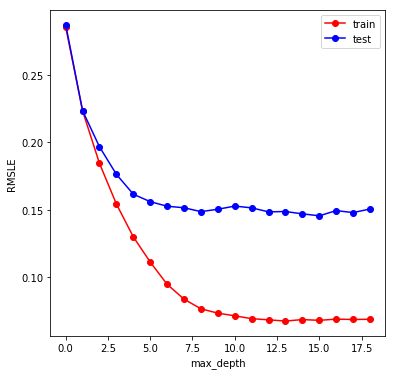

In [46]:
plt.figure(figsize=(6,6))
plt.plot(train_acc,'or-')
plt.plot(test_acc,'ob-')
plt.xlabel('max_depth')
plt.ylabel('RMSLE')
plt.legend(['train', 'test'])

### more tests

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer

def err(y_true, y_pred):
    return np.sqrt(np.average((np.log(y_pred/y_true)) ** 2))

scorer = make_scorer(err, greater_is_better=False)

params = {
    'n_estimators':900,
    'min_samples_leaf': range(5,25,5),
    'max_features': ['sqrt', 'log2'],
    'max_depth':range(2,15,2) 
}

search = RandomizedSearchCV( RandomForestRegressor(), params, scoring=scorer, cv=5, n_iter=20, return_train_score=True, iid=False)
search.fit(X, y)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=False, n_iter=100, n_jobs=None,
          param_distributions={'n_estimators': range(100, 1000, 200), 'criterion': ['mse', 'friedman_mse', 'mae'], 'min_samples_leaf': range(5, 25, 5), 'max_features': ['sqrt', 'log2'], 'max_depth': range(2, 15, 2)},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True,
          scoring=make_scorer(err, greater_is_better=False), verbose=0)

In [72]:
results = pd.DataFrame(search.cv_results_)
display(results.head())

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.568411      0.014180         0.028399        0.001024   
1       0.296998      0.008702         0.018593        0.000798   
2       3.298175      0.034703         0.028191        0.000737   
3       0.214600      0.001021         0.012200        0.000402   
4       0.049801      0.000742         0.004197        0.000385   

  param_n_estimators param_min_samples_leaf param_max_features  \
0                700                     10               sqrt   
1                500                     20               log2   
2                900                      5               sqrt   
3                300                     20               sqrt   
4                100                      5               log2   

  param_max_depth param_criterion  \
0              10    friedman_mse   
1               4             mse   
2               2             mae   
3              14             mse   
4               2             mse   

                                              params       ...         \
0  {'n_estimators': 700, 'min_samples_leaf': 10, ...       ...          
1  {'n_estimators': 500, 'min_samples_leaf': 20, ...       ...          
2  {'n_estimators': 900, 'min_samples_leaf': 5, '...       ...          
3  {'n_estimators': 300, 'min_samples_leaf': 20, ...       ...          
4  {'n_estimators': 100, 'min_samples_leaf': 5, '...       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0        -0.013227        0.001371               20           -0.011580   
1        -0.015575        0.001517               75           -0.015105   
2        -0.019761        0.001549               98           -0.019844   
3        -0.014319        0.001431               43           -0.013557   
4        -0.019284        0.001442               91           -0.019453   

   split1_train_score  split2_train_score  split3_train_score  \
0           -0.011424           -0.011259           -0.011190   
1           -0.014816           -0.014614           -0.014455   
2           -0.019279           -0.019286           -0.019194   
3           -0.013284           -0.013198           -0.012982   
4           -0.018862           -0.018621           -0.018187   

   split4_train_score  mean_train_score  std_train_score  
0           -0.011724         -0.011435         0.000198  
1           -0.015064         -0.014811         0.000251  
2           -0.019858         -0.019492         0.000295  
3           -0.013593         -0.013323         0.000228  
4           -0.019303         -0.018885         0.000459  

[5 rows x 25 columns]

<IPython.core.display.Javascript object>


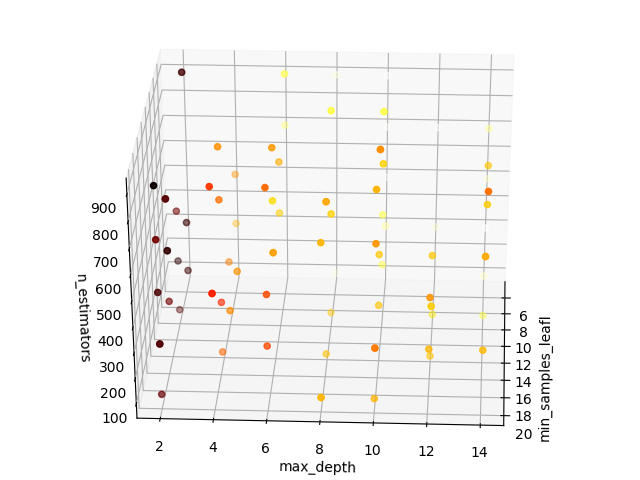

In [75]:
results.sort_values(by=['rank_test_score'], inplace=True)

fig = plt.figure()
ax = Axes3D(fig)

x=results['param_min_samples_leaf']
y=results['param_max_depth']
z=results['param_n_estimators']

x1, y1 = np.meshgrid(x, y)

cset = ax.scatter(x,y,z,c=results['mean_train_score'],cmap='hot')
ax.set_xlabel('min_samples_leafl')
ax.set_ylabel('max_depth')
ax.set_zlabel('n_estimators')

#ax.clabel(cset, fontsize=9, inline=1)
plt.show()